<a href="https://colab.research.google.com/github/larsondg2000/Colab-Projects/blob/main/Pairs_Trading_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

# Define the ticker symbols for KO and PEP
# tickers = ["KO", "PEP"]
# tickers = ['MSFT', 'AAPL']
# tickers = ['V', 'MA']
tickers = ['PG', 'JNJ']
# tickers = ['T', 'VZ']
#tickers = ['BTC-USD', 'ETH-USD']

# Retrieve the historical prices for the tickers
prices = yf.download(tickers,
                     start="2023-02-01", end="2024-02-13")["Adj Close"]

# Print the last 5 rows of the prices DataFrame
print(prices.tail())

[*********************100%%**********************]  2 of 2 completed

Ticker             JNJ          PG
Date                              
2024-02-06  158.059998  158.960007
2024-02-07  157.979996  159.119995
2024-02-08  156.399994  158.639999
2024-02-09  156.759995  157.419998
2024-02-12  157.850006  157.110001


In [ ]:
asset1 = prices[tickers[0]]
asset2 = prices[tickers[1]]

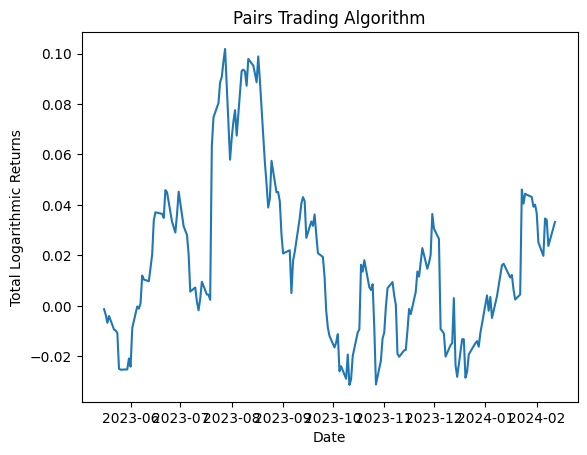

In [ ]:
# Compute the spread between the two assets
# spread = asset1 - asset2

# Compute the rolling mean and standard deviation for each asset
asset1_mean = asset1.rolling(window=30).mean()
asset1_std = asset1.rolling(window=30).std()
asset2_mean = asset2.rolling(window=30).mean()
asset2_std = asset2.rolling(window=30).std()

# Compute the z-scores for each asset based on its rolling mean and standard deviation
z1 = (asset1 - asset1_mean) / asset1_std
z2 = (asset2 - asset2_mean) / asset2_std

# Compute the spread between the two assets
spread = z1 - z2

# Compute the rolling mean and standard deviation of the spread
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()

# Compute the rolling z-score for the spread
# spread_zscore = (spread - spread_mean) / spread_std

# Compute the upper and lower bounds for the spread
upper_bound = spread_mean + 2 * spread_std
lower_bound = spread_mean - 2 * spread_std

# Compute the long and short signals
long_signal = (spread < lower_bound).astype(int)
short_signal = (spread > upper_bound).astype(int)

# Compute the positions for each asset
# asset1_position = -long_signal + short_signal
# asset2_position = long_signal - short_signal
asset1_position = long_signal - short_signal
asset2_position = -long_signal + short_signal

# Extend the signal
asset1_position_old = asset1_position.copy()
asset1_position[asset1_position == 0] = np.nan
asset1_position.ffill(inplace=True)
asset2_position_old = asset2_position.copy()
asset2_position[asset2_position == 0] = np.nan
asset2_position.ffill(inplace=True)

# Long-only
asset1_position[asset1_position < 0] = 0
asset2_position[asset2_position < 0] = 0

# Compute the portfolio logarithmic returns
asset1_returns = asset1.pct_change()
asset2_returns = asset2.pct_change()
portfolio_returns = asset1_position.shift(1) * asset1_returns + \
  asset2_position.shift(1) * asset2_returns

# Compute the total logarithmic returns and plot the results
plt.plot((portfolio_returns + 1).cumprod() - 1)
plt.title("Pairs Trading Algorithm")
plt.xlabel("Date")
plt.ylabel("Total Logarithmic Returns")
plt.show()

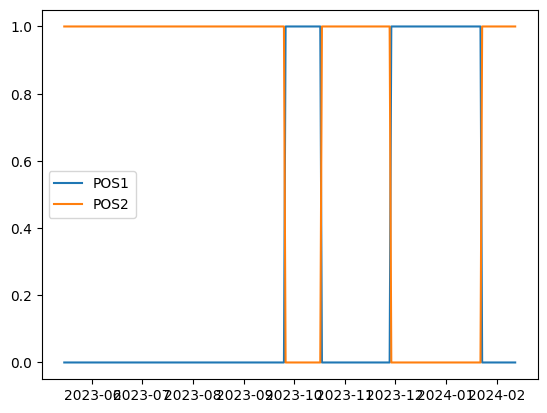

In [ ]:
# Plot the trading signal - what does it look like? Pos 1 Blue, Pos 2 Orange
plt.plot(asset1_position, label='POS1')
plt.plot(asset2_position, label='POS2')
plt.legend();

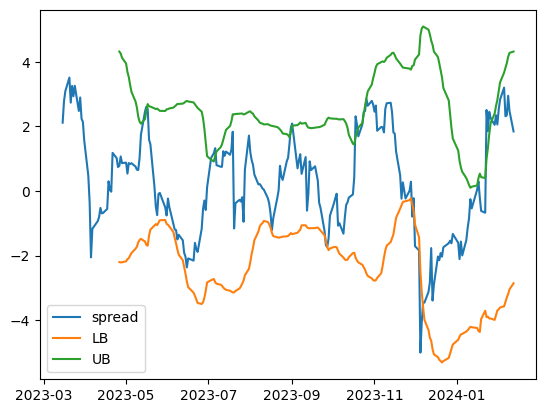

In [ ]:
# What should the trading signal be? Plot spread vs UB / LB
plt.plot(spread, label='spread')
plt.plot(lower_bound, label='LB')
plt.plot(upper_bound, label='UB')
plt.legend();

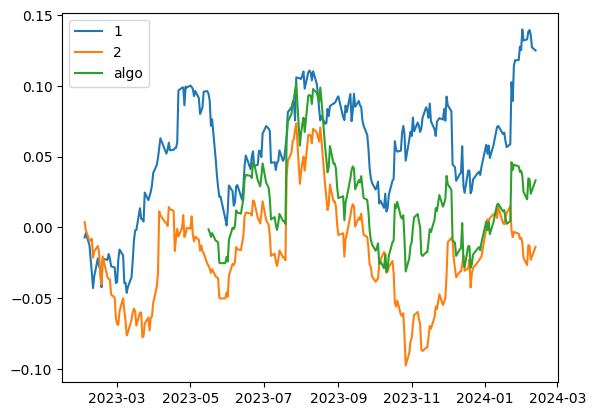

In [ ]:
# Compare with buy-and-hold
plt.plot((asset1_returns + 1).cumprod() - 1, label='1')
plt.plot((asset2_returns + 1).cumprod() - 1, label='2')
plt.plot((portfolio_returns + 1).cumprod() - 1, label='algo')
plt.legend();

In [ ]:
# Plot the trading signal - should we extend it?

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=BA49TH_mraBJUE8qPYLAOA&n=Pairs+Trading+ChatGPT)